# Objectives


## 1. Basics of Relational Databases

**Connecting to your database**
- SQLAlchemy
  - Core (relational model focused)
  - ORM (user data model focused)
- Steps
  - creating an engine
  - establishing a connection
  - initialize our metadata and reflect the table
  - building select statement
  - executing the statement and fetch all the result

In [ ]:
from sqlalchemy import create_engine, Table, MetaData
engine = create_engine('sqlite:///database.sqlite')
connection = engine.connect()
metadata = MetaData()
census = Table('census', metadata,
              autoload = True,
              autoload_with = engine)
stmt = select([census])
results = connection.execute(stmt).fetchall()

In [9]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///census.sqlite')
connection = engine.connect()

- *Engine: common interface to the database from SQLAlchemy*
- *Connection string: all the details required to find the databse (and login, if necessary)*

In [21]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///C:\QXJ\Python\Datacamp\pandas\census.sqlite')
print(inspector.get_table_names())

['census', 'state_fact', 'states']


In [11]:
# reflection reads databse and build SQLAlchemy table objects

from sqlalchemy import MetaData, Table
metadata = MetaData()
census = Table('census', metadata, autoload = True,
              autoload_with = engine)
print(repr(census))

# repr() returns a printable representation of an object in Python.

Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)


In [12]:
# Print the column names
print(census.columns.keys())

['state', 'sex', 'age', 'pop2000', 'pop2008']


**SQL queries**
- select, insert, update, and delete data
- create and alter data

In [192]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///C:\QXJ\Python\Datacamp\pandas\census.sqlite')
connection = engine.connect() 
stmt = 'select * from census'
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()

- **result_proxy** is a **ResultProxy**
- **results** is a **ResultSet**

In [20]:
first_row = results[0]
print(first_row)

('Illinois', 'M', 0, 89600, 95012)


In [25]:
print(first_row.keys())

['state', 'sex', 'age', 'pop2000', 'pop2008']


In [28]:
print(first_row.state)
# first column of the first row
print(first_row[0])

Illinois
Illinois


In [27]:
# use a table will select all the columns in it
from sqlalchemy import select
stmt = select([census])
print(stmt)

SELECT census.state, census.sex, census.age, census.pop2000, census.pop2008 
FROM census


## 2. Applying Filtering, Ordering and Grouping to Queries
- filtering
  - boolean: = < > !=
  - expression: in_(), like(), between()
  - conjunctions: and_(), or_(), not_()
- ordering: order_by()
- aggregation function and grouping
  - count, sum -> from sqlalchemy import func

**filter the query**

In [46]:
# filter
stmt = select([census])
stmt = stmt.where(census.columns.state == 'California')
results = connection.execute(stmt).fetchall()
for result in results:
    print(result.state, result.age)

California 0
California 1
California 2
California 3
California 4
California 5
California 6
California 7
California 8
California 9
California 10
California 11
California 12
California 13
California 14
California 15
California 16
California 17
California 18
California 19
California 20
California 21
California 22
California 23
California 24
California 25
California 26
California 27
California 28
California 29
California 30
California 31
California 32
California 33
California 34
California 35
California 36
California 37
California 38
California 39
California 40
California 41
California 42
California 43
California 44
California 45
California 46
California 47
California 48
California 49
California 50
California 51
California 52
California 53
California 54
California 55
California 56
California 57
California 58
California 59
California 60
California 61
California 62
California 63
California 64
California 65
California 66
California 67
California 68
California 69
California 70
California 71
Ca

In [34]:
stmt = select([census])
stmt = stmt.where(census.columns.state.startswith('New'))
for result in connection.execute(stmt):
    print(result.state, result.pop2000)

New Jersey 56983
New Jersey 56686
New Jersey 57011
New Jersey 57912
New Jersey 59359
New Jersey 60392
New Jersey 60739
New Jersey 61579
New Jersey 62089
New Jersey 63384
New Jersey 64593
New Jersey 62494
New Jersey 60570
New Jersey 58189
New Jersey 57931
New Jersey 56752
New Jersey 55887
New Jersey 56712
New Jersey 53265
New Jersey 48344
New Jersey 49564
New Jersey 48141
New Jersey 48353
New Jersey 49130
New Jersey 48723
New Jersey 51092
New Jersey 50357
New Jersey 52179
New Jersey 55938
New Jersey 60638
New Jersey 64220
New Jersey 61484
New Jersey 61927
New Jersey 63487
New Jersey 66737
New Jersey 71274
New Jersey 71449
New Jersey 71026
New Jersey 71811
New Jersey 72043
New Jersey 73665
New Jersey 70514
New Jersey 69835
New Jersey 68650
New Jersey 65564
New Jersey 65529
New Jersey 61817
New Jersey 59206
New Jersey 56977
New Jersey 55780
New Jersey 56235
New Jersey 53235
New Jersey 54900
New Jersey 58013
New Jersey 43584
New Jersey 42959
New Jersey 42179
New Jersey 45575
New Jersey 383

In [37]:
from sqlalchemy import or_
stmt = select([census])
stmt = stmt.where(
or_(census.columns.state == 'California',
   census.columns.state == 'New York'
   )
)

for result in connection.execute(stmt):
    print(result.state, result.sex)

New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
California M
California M
California M
California M
California M
California M
California M
Califor

In [38]:
# Define a list of states for which we want results
states = ['New York', 'California', 'Texas']

# Create a query for the census table: stmt
stmt = select([census])

# Append a where clause to match all the states in_ the list states
stmt = stmt.where(census.columns.state.in_(states))

# Loop over the ResultProxy and print the state and its population in 2000
for result in connection.execute(stmt):
    print(result.state, result.pop2000)

New York 126237
New York 124008
New York 124725
New York 126697
New York 131357
New York 133095
New York 134203
New York 137986
New York 139455
New York 142454
New York 145621
New York 138746
New York 135565
New York 132288
New York 132388
New York 131959
New York 130189
New York 132566
New York 132672
New York 133654
New York 132121
New York 126166
New York 123215
New York 121282
New York 118953
New York 123151
New York 118727
New York 122359
New York 128651
New York 140687
New York 149558
New York 139477
New York 138911
New York 139031
New York 145440
New York 156168
New York 153840
New York 152078
New York 150765
New York 152606
New York 159345
New York 148628
New York 147892
New York 144195
New York 139354
New York 141953
New York 131875
New York 128767
New York 125406
New York 124155
New York 125955
New York 118542
New York 118532
New York 124418
New York 95025
New York 92652
New York 90096
New York 95340
New York 83273
New York 77213
New York 77054
New York 72212
New York 70967
N

In [39]:
# Import and_
from sqlalchemy import and_

# Build a query for the census table: stmt
stmt = select([census])

# Append a where clause to select only non-male records from California using and_
stmt = stmt.where(
    # The state of California with a non-male sex
    and_(census.columns.state == 'California',
         census.columns.sex != 'M'
         )
)

# Loop over the ResultProxy printing the age and sex
for result in connection.execute(stmt):
    print(result.age, result.sex)

0 F
1 F
2 F
3 F
4 F
5 F
6 F
7 F
8 F
9 F
10 F
11 F
12 F
13 F
14 F
15 F
16 F
17 F
18 F
19 F
20 F
21 F
22 F
23 F
24 F
25 F
26 F
27 F
28 F
29 F
30 F
31 F
32 F
33 F
34 F
35 F
36 F
37 F
38 F
39 F
40 F
41 F
42 F
43 F
44 F
45 F
46 F
47 F
48 F
49 F
50 F
51 F
52 F
53 F
54 F
55 F
56 F
57 F
58 F
59 F
60 F
61 F
62 F
63 F
64 F
65 F
66 F
67 F
68 F
69 F
70 F
71 F
72 F
73 F
74 F
75 F
76 F
77 F
78 F
79 F
80 F
81 F
82 F
83 F
84 F
85 F


In [64]:
from sqlalchemy import create_engine, Table, MetaData

engine = create_engine('sqlite:///C:\QXJ\Python\Datacamp\pandas\census.sqlite')
connection = engine.connect()
print(engine.table_names())

metadata = MetaData()
census = Table('census', metadata,
              autoload = True,
              autoload_with = engine)
census

['census', 'state_fact']


Table('census', MetaData(bind=None), Column('state', VARCHAR(length=30), table=<census>), Column('sex', VARCHAR(length=1), table=<census>), Column('age', INTEGER(), table=<census>), Column('pop2000', INTEGER(), table=<census>), Column('pop2008', INTEGER(), table=<census>), schema=None)

In [65]:
print(census.columns.keys())

['state', 'sex', 'age', 'pop2000', 'pop2008']


In [73]:
from sqlalchemy import select

stmt = select([census])
results = connection.execute(stmt).fetchall()

In [74]:
print(results[:10])

[('Illinois', 'M', 0, 89600, 95012), ('Illinois', 'M', 1, 88445, 91829), ('Illinois', 'M', 2, 88729, 89547), ('Illinois', 'M', 3, 88868, 90037), ('Illinois', 'M', 4, 91947, 91111), ('Illinois', 'M', 5, 93894, 89802), ('Illinois', 'M', 6, 93676, 88931), ('Illinois', 'M', 7, 94818, 90940), ('Illinois', 'M', 8, 95035, 86943), ('Illinois', 'M', 9, 96436, 86055)]


**order_by**

In [75]:
stmt = select([census.columns.state])
stmt = stmt.order_by(census.columns.state)
results = connection.execute(stmt).fetchall()
print(results[:10])

[('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',)]


In [76]:
print(results[0])

('Alabama',)


In [78]:
# order by multiple
stmt = select([census.columns.state,
              census.columns.sex])
stmt = stmt.order_by(census.columns.state,
                    census.columns.sex)
results = connection.execute(stmt).first()
print(results[:10])

('Alabama', 'F')


**Counting, summing and grouping data**
- sqlalchemy generates 'column names' for functions in the ResultSet, such as func_# 
- -> count_1, replaced by **.label()** method

**aggregation func**

In [79]:
# func.sum
from sqlalchemy import func
stmt = select([func.sum(census.columns.pop2008)])
results = connection.execute(stmt).scalar()
print(results)

302876613


**group_by()**

In [80]:
# group_by()
from sqlalchemy import func
stmt = select([census.columns.sex.distinct(),
               func.sum(census.columns.pop2008)])
stmt = stmt.group_by(census.columns.sex)
results = connection.execute(stmt).fetchall()
print(results)

[('F', 153959198), ('M', 148917415)]


In [193]:
# group_by - multi-columns
from sqlalchemy import func
stmt = select([census.columns.sex,
               census.columns.age,
               func.sum(census.columns.pop2008)])
stmt = stmt.group_by(census.columns.sex,
                    census.columns.age)
stmt = stmt.limit(5)
results = connection.execute(stmt).fetchall()
print(results[:10])

[('F', 0, 2105442), ('F', 1, 2087705), ('F', 2, 2037280), ('F', 3, 2012742), ('F', 4, 2014825)]


In [82]:
print(results[0].keys())

['sex', 'age', 'sum_1']


In [83]:
# label the new func column 
stmt = select([
    census.columns.sex,
    func.sum(census.columns.pop2008).label('pop2008_sum')
])

stmt = stmt.group_by(census.columns.sex)
results = connection.execute(stmt).fetchall()
print(results[0].keys())

['sex', 'pop2008_sum']


**SQLAlchemy and pandas for visualization**

In [85]:
import pandas as pd
df = pd.DataFrame(results)
df.columns = results[0].keys()
df

,sex,pop2008_sum
0,F,153959198
1,M,148917415


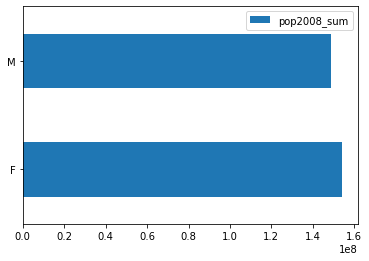

In [90]:
import matplotlib.pyplot as plt
df.plot.barh()
plt.yticks([0,1],['F','M'])
plt.show()

## 3. Advanced SQLAlchemy Queries

**Calculating difference**

In [92]:
from sqlalchemy import desc
stmt = select([census.columns.age,
              (census.columns.pop2008 - 
              census.columns.pop2000).label('pop_change')
              ])
stmt = stmt.group_by(census.columns.age)
stmt = stmt.order_by(desc('pop_change'))
stmt = stmt.limit(5)
results = connection.execute(stmt).fetchall()
print(results)

[(61, 25201), (54, 23503), (55, 21716), (60, 19677), (58, 19526)]


**Case statment**
- treat data differently based on a condition
- accpets a list of conditoins to match and a column to return if the condition matches
- the list of conditions ends with an else clause to determine what todo when a record doesn't match any prior conditions

**cast statement**
- convert data to another type
  - integers to floats for division
  - strings to dates and times
- accepts a column or expression and the target type

In [93]:
from sqlalchemy import case
stmt = select([
    func.sum(
    case([
        (census.columns.state == 'New York',
        census.columns.pop2008)
    ], else_ = 0))
])
results = connection.execute(stmt).fetchall()
print(results)

[(19465159,)]


In [97]:
from sqlalchemy import case, cast, Float
stmt = select([
    (func.sum(
    case([
        (census.columns.state == 'New York',
        census.columns.pop2008)
    ], else_=0))/
    cast(func.sum(census.columns.pop2008),
        Float) * 100).label('ny_percent')
])

results = connection.execute(stmt).fetchall()
results

[(6.426761976501632,)]

**SQL relationships**
- join
  - automatic join: select_from(); join()
  - join: select_from(); join()

In [2]:
# connect to the database
from sqlalchemy import create_engine, MetaData, Table

engine = create_engine('sqlite:///C:\QXJ\Python\Datacamp\pandas\census.sqlite')
engine.table_names()

['census', 'state_fact']

In [3]:
#  get the metadata of state_fact
metadata = MetaData()
state_fact = Table('state_fact', metadata,
                  autoload = True,
                  autoload_with = engine)
state_fact

Table('state_fact', MetaData(bind=None), Column('id', VARCHAR(length=256), table=<state_fact>), Column('name', VARCHAR(length=256), table=<state_fact>), Column('abbreviation', VARCHAR(length=256), table=<state_fact>), Column('country', VARCHAR(length=256), table=<state_fact>), Column('type', VARCHAR(length=256), table=<state_fact>), Column('sort', VARCHAR(length=256), table=<state_fact>), Column('status', VARCHAR(length=256), table=<state_fact>), Column('occupied', VARCHAR(length=256), table=<state_fact>), Column('notes', VARCHAR(length=256), table=<state_fact>), Column('fips_state', VARCHAR(length=256), table=<state_fact>), Column('assoc_press', VARCHAR(length=256), table=<state_fact>), Column('standard_federal_region', VARCHAR(length=256), table=<state_fact>), Column('census_region', VARCHAR(length=256), table=<state_fact>), Column('census_region_name', VARCHAR(length=256), table=<state_fact>), Column('census_division', VARCHAR(length=256), table=<state_fact>), Column('census_divisio

In [5]:
state_fact.columns.keys()

['id',
 'name',
 'abbreviation',
 'country',
 'type',
 'sort',
 'status',
 'occupied',
 'notes',
 'fips_state',
 'assoc_press',
 'standard_federal_region',
 'census_region',
 'census_region_name',
 'census_division',
 'census_division_name',
 'circuit_court']

In [8]:
# get census table
census = Table('census', metadata,
              autoload = True,
              autoload_with = engine)
census.columns.keys()

['state', 'sex', 'age', 'pop2000', 'pop2008']

In [12]:
from sqlalchemy import select

# automatic join -> select columns from two tables
connection = engine.connect()
stmt = select([census.columns.pop2008,
              state_fact.columns.abbreviation])
results = connection.execute(stmt).fetchmany(size = 10)
print(results)

[(95012, 'IL'), (95012, 'NJ'), (95012, 'ND'), (95012, 'OR'), (95012, 'DC'), (95012, 'WI'), (95012, 'AZ'), (95012, 'AR'), (95012, 'CO'), (95012, 'HI')]


In [13]:
# Build a statement to join census and state_fact tables: stmt
stmt = select([census.columns.pop2000, state_fact.columns.abbreviation])

# Execute the statement and get the first result: result
result = connection.execute(stmt).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))

pop2000 89600
abbreviation IL


In [ ]:
# join two talbes using select_from() and join()
stmt = select([func.sum(census.columns.pop2000)])
stmt = stmt.select_from(census.join(state_fact))
stmt = stmt.where(state_fact.columns.circuit_court == '10')
results  = connection.execute(stmt).scalar()

**Join tables without predefined relationship**

In [ ]:
# join two tables by define which column to join
stmt = select([func.sum(census.columns.pop2000)])
stmt = stmt.select_from(
census.join(state_fact, census.columns.state
           == state_fact.columns.name))
stmt = stmt.where(state_fact.columns.census_division_name ==
                 'East South Central')
results = connection.execute(stmt).scalar()
print(results)

**Working with hierarchical tables**
- contain relationship with themselves
- coommonly used in 
  - organizational 
  - geographic
  - network
  - graph

In [18]:
engine = create_engine('sqlite:///C:\QXJ\Python\Datacamp\pandas\employees.sqlite')
print(engine.table_names())

connection = engine.connect()
metadata = MetaData()
employees = Table('employees', metadata,
                autoload = True,
                autoload_with = engine)
print(repr(employees))

['employees', 'managers', 'state_fact']
Table('employees', MetaData(bind=None), Column('id', INTEGER(), table=<employees>, primary_key=True, nullable=False), Column('name', VARCHAR(length=20), table=<employees>), Column('job', VARCHAR(length=20), table=<employees>), Column('mgr', INTEGER(), table=<employees>), Column('hiredate', DATETIME(), table=<employees>), Column('sal', NUMERIC(precision=7, scale=2), table=<employees>), Column('comm', NUMERIC(precision=7, scale=2), table=<employees>), Column('dept', INTEGER(), table=<employees>), schema=None)


In [14]:
# Build a statement to select the census and state_fact tables: stmt
stmt = select([census, state_fact])

# Add a select_from clause that wraps a join for the census and state_fact
# tables where the census state column and state_fact name column match
stmt_join = stmt.select_from(
    census.join(state_fact, census.columns.state == state_fact.columns.name))

# Execute the statement and get the first result: result
result = connection.execute(stmt_join).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))

state Illinois
sex M
age 0
pop2000 89600
pop2008 95012
id 13
name Illinois
abbreviation IL
country USA
type state
sort 10
status current
occupied occupied
notes 
fips_state 17
assoc_press Ill.
standard_federal_region V
census_region 2
census_region_name Midwest
census_division 3
census_division_name East North Central
circuit_court 7


In [16]:
from sqlalchemy import func

# Build a statement to select the state, sum of 2008 population and census
# division name: stmt
stmt = select([
    census.columns.state,
    func.sum(census.columns.pop2008),
    state_fact.columns.census_division_name
])

# Append select_from to join the census and state_fact tables by the census state and state_fact name columns
stmt_joined = stmt.select_from(
    census.join(state_fact, census.columns.state == state_fact.columns.name)
)

# Append a group by for the state_fact name column
stmt_grouped = stmt_joined.group_by(state_fact.columns.name)

# Execute the statement and get the results: results
results = connection.execute(stmt_grouped).fetchall()

# Loop over the results object and print each record.
for record in results:
    print(record)

('Alabama', 4649367, 'East South Central')
('Alaska', 664546, 'Pacific')
('Arizona', 6480767, 'Mountain')
('Arkansas', 2848432, 'West South Central')
('California', 36609002, 'Pacific')
('Colorado', 4912947, 'Mountain')
('Connecticut', 3493783, 'New England')
('Delaware', 869221, 'South Atlantic')
('Florida', 18257662, 'South Atlantic')
('Georgia', 9622508, 'South Atlantic')
('Hawaii', 1250676, 'Pacific')
('Idaho', 1518914, 'Mountain')
('Illinois', 12867077, 'East North Central')
('Indiana', 6373299, 'East North Central')
('Iowa', 3000490, 'West North Central')
('Kansas', 2782245, 'West North Central')
('Kentucky', 4254964, 'East South Central')
('Louisiana', 4395797, 'West South Central')
('Maine', 1312972, 'New England')
('Maryland', 5604174, 'South Atlantic')
('Massachusetts', 6492024, 'New England')
('Michigan', 9998854, 'East North Central')
('Minnesota', 5215815, 'West North Central')
('Mississippi', 2922355, 'East South Central')
('Missouri', 5891974, 'West North Central')
('Mon

In [109]:
print(employees.columns.keys())

['id', 'name', 'job', 'mgr', 'hiredate', 'sal', 'comm', 'dept']


In [132]:
stmt = 'select * from employees'
results = connection.execute(stmt).fetchall()
results

[(1, 'JOHNSON', 'ADMIN', 6, '12-17-1990', 18000, None, 4),
 (2, 'HARDING', 'MANAGER', 9, '02-02-1998', 52000, 300, 3),
 (3, 'TAFT', 'SALES I', 2, '01-02-1996', 25000, 500, 3),
 (4, 'HOOVER', 'SALES I', 2, '04-02-1990', 27000, None, 3),
 (5, 'LINCOLN', 'TECH', 6, '06-23-1994', 22500, 1400, 4),
 (6, 'GARFIELD', 'MANAGER', 9, '05-01-1993', 54000, None, 4),
 (7, 'POLK', 'TECH', 6, '09-22-1997', 25000, None, 4),
 (8, 'GRANT', 'ENGINEER', 10, '03-30-1997', 32000, None, 2),
 (9, 'JACKSON', 'CEO', None, '01-01-1990', 75000, None, 4),
 (10, 'FILLMORE', 'MANAGER', 9, '08-09-1994', 56000, None, 2),
 (11, 'ADAMS', 'ENGINEER', 10, '03-15-1996', 34000, None, 2),
 (12, 'WASHINGTON', 'ADMIN', 6, '04-16-1998', 18000, None, 4),
 (13, 'MONROE', 'ENGINEER', 10, '12-03-2000', 30000, None, 2),
 (14, 'ROOSEVELT', 'CPA', 9, '10-12-1995', 35000, None, 1)]

**My own Notes**

In [111]:
employ_df = pd.DataFrame(results,
                        columns = employees.columns.keys())
employ_df.head()

,id,name,job,mgr,hiredate,sal,comm,dept
0,1,JOHNSON,ADMIN,6.0,12-17-1990,18000,NaN,4
1,2,HARDING,MANAGER,9.0,02-02-1998,52000,300.0,3
2,3,TAFT,SALES I,2.0,01-02-1996,25000,500.0,3
3,4,HOOVER,SALES I,2.0,04-02-1990,27000,NaN,3
4,5,LINCOLN,TECH,6.0,06-23-1994,22500,1400.0,4


**Using alias to handle same table joined queries**

In [20]:
managers = employees.alias()

stmt = select([managers.columns.name.label('manager'),
employees.columns.name.label('employee')])

stmt = stmt.select_from(employees.join(managers, 
                                      managers.columns.id == employees.columns.mgr))

stmt = stmt.order_by(managers.columns.name)

results = connection.execute(stmt).fetchall()
results

[('FILLMORE', 'GRANT'),
 ('FILLMORE', 'ADAMS'),
 ('FILLMORE', 'MONROE'),
 ('GARFIELD', 'JOHNSON'),
 ('GARFIELD', 'LINCOLN'),
 ('GARFIELD', 'POLK'),
 ('GARFIELD', 'WASHINGTON'),
 ('HARDING', 'HOOVER'),
 ('JACKSON', 'HARDING'),
 ('JACKSON', 'GARFIELD'),
 ('JACKSON', 'FILLMORE'),
 ('JACKSON', 'ROOSEVELT')]

In [21]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select names of managers and their employees: stmt
stmt = select(
    [managers.columns.name.label('manager'),
     employees.columns.name.label('employee')]
)

# Match managers id with employees mgr: stmt_matched
stmt_matched = stmt.where(managers.columns.id == employees.columns.mgr)

# Order the statement by the managers name: stmt_ordered
stmt_ordered = stmt_matched.order_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt_ordered).fetchall()

# Print records
for record in results:
    print(record)

('FILLMORE', 'GRANT')
('FILLMORE', 'ADAMS')
('FILLMORE', 'MONROE')
('GARFIELD', 'JOHNSON')
('GARFIELD', 'LINCOLN')
('GARFIELD', 'POLK')
('GARFIELD', 'WASHINGTON')
('HARDING', 'HOOVER')
('JACKSON', 'HARDING')
('JACKSON', 'GARFIELD')
('JACKSON', 'FILLMORE')
('JACKSON', 'ROOSEVELT')


In [128]:
managers = employees.alias()

stmt = 'select mgr.name, employees.name from employees as mgr \
join employees \
on mgr.id = employees.mgr \
order by mgr.name'

results = connection.execute(stmt).fetchall()
results

[('FILLMORE', 'GRANT'),
 ('FILLMORE', 'ADAMS'),
 ('FILLMORE', 'MONROE'),
 ('GARFIELD', 'JOHNSON'),
 ('GARFIELD', 'LINCOLN'),
 ('GARFIELD', 'POLK'),
 ('GARFIELD', 'WASHINGTON'),
 ('HARDING', 'TAFT'),
 ('HARDING', 'HOOVER'),
 ('JACKSON', 'HARDING'),
 ('JACKSON', 'GARFIELD'),
 ('JACKSON', 'FILLMORE'),
 ('JACKSON', 'ROOSEVELT')]

**Use group_by and func with alias**
- it is important target **group_by()** at the right alias
- be careful with what you perform functions on 
- if you do not find yourself using both the alias and the table name for a query, dont create the alias at all

In [130]:
managers = employees.alias()
stmt = select([managers.columns.name,
              func.sum(employees.columns.sal)])
stmt = stmt.select_from(employees.join(
managers, managers.columns.id == employees.columns.mgr))
stmt = stmt.group_by(managers.columns.name)
results = connection.execute(stmt).fetchall()
results

[('FILLMORE', Decimal('96000.00')),
 ('GARFIELD', Decimal('83500.00')),
 ('HARDING', Decimal('52000.00')),
 ('JACKSON', Decimal('197000.00'))]

In [22]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select names of managers and counts of their employees: stmt
stmt = select([managers.columns.name, 
func.count(employees.columns.id)])

# Append a where clause that ensures the manager id and employee mgr are equal
stmt_matched = stmt.where(managers.columns.id == employees.columns.mgr)

# Group by Managers Name
stmt_grouped = stmt_matched.group_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt_grouped).fetchall()

# print manager
for record in results:
    print(record)

('FILLMORE', 3)
('GARFIELD', 4)
('HARDING', 1)
('JACKSON', 4)


**Dealing with large ResultSets - Working on blocks of records**
- **fetchmany(size = n)**: n-rows we want to act upon
- we can loop over **fetchmany()**
- it returns an empty list when there are not more records
- we have to close the **ResultProxy** afterwards

In [ ]:
stmt = 'select * from employees'
results_proxy = connection.execute(stmt)

while more_results:
    partial_results = results_proxy.fetchmany(5)
    if partial_results == []:
        more_results = False
    for row in partial_results:
        state_count[row.state] += 1
results_proxy.close()

In [ ]:
while more_results:
    # Fetch the first 50 results from the ResultProxy: partial_results
    partial_results = results_proxy.fetchmany(size = 50)

    # if empty list, set more_results to False
    if partial_results == []:
        more_results = False

    # Loop over the fetched records and increment the count for the state
    for row in partial_results:
        if row.state in state_count:
            state_count[row.state] += 1
        else:
            state_count[row.state] = 1

# Close the ResultProxy, and thus the connection
results_proxy.close()

# Print the count by state
print(state_count)

## 4. Creating and Manipulating your own Databases
- **metadata.create_all(engine)**
- **unique** forces all values for the data in a columnto be unique
- **nullable** determines in a column can be empty in a row
- **default** sets a default value if one is not supplies

In [144]:
engine.table_names()

['employees', 'state_fact']

*Need to use other tools to handle database table updates,such as Alembic or raw SQL*

In [146]:
managers = Table('managers', metadata,
                Column('id', Integer()),
                Column('name', String(255), unique = True, nullable = False),
                Column('sal', Float, default = 1000),
                Column('active', Boolean(), default = True))
managers.constraints

{CheckConstraint(<sqlalchemy.sql.elements.BinaryExpression object at 0x000001403089C700>, name='_unnamed_', table=Table('managers', MetaData(bind=None), Column('id', Integer(), table=<managers>), Column('name', String(length=255), table=<managers>, nullable=False), Column('sal', Float(), table=<managers>, default=ColumnDefault(1000)), Column('active', Boolean(), table=<managers>, default=ColumnDefault(True)), schema=None), _create_rule=<sqlalchemy.util.langhelpers.portable_instancemethod object at 0x000001403083AA80>, _type_bound=True),
 PrimaryKeyConstraint(),
 UniqueConstraint(Column('name', String(length=255), table=<managers>, nullable=False))}

In [10]:
from sqlalchemy import (create_engine, MetaData, Table, inspect, Column, String, Integer, Boolean)

engine = create_engine('sqlite:///c:\QXJ\Python\Datacamp\pandas\census.sqlite')
metadata = MetaData()
inspector = inspect(engine)

# create a table
states = Table('states', metadata,
                  Column('state', String(255)),
                  Column('abbreviation', String(128)),
                  Column('circuit_court', Integer(), default = 20),
                  extend_existing=True)
metadata.create_all(engine)

inspector.get_table_names()

['census', 'state_fact', 'states']

In [11]:
from sqlalchemy import insert

connection = engine.connect()

# insert the table
values_list = [
    {'state': 'Alabama',
    'abbreviation': 'AL',
    'circuit_count': 20 },
        {'state': 'Carlifornia',
    'abbreviation': 'CA',
    'circuit_count': 40},
        {'state': 'New York',
    'abbreviation': 'NY',
    'circuit_count': 30},
        {'state': 'IIIinois',
    'abbreviation': 'IL',
    'circuit_count': 40},
        {'state': 'Ohio',
    'abbreviation': 'OH',
    'circuit_count':  10}
]

stmt = insert(states)
result_proxy = connection.execute(stmt,values_list)
print(result_proxy.rowcount)

5


In [12]:
from sqlalchemy import select 
import pandas as pd

stmt = select([states])
result = connection.execute(stmt).fetchall()
states = pd.DataFrame(result, columns = states.columns.keys())
states

,state,abbreviation,circuit_court
0,Alabama,AL,20
1,Carlifornia,CA,20
2,New York,NY,20
3,IIIinois,IL,20
4,Ohio,OH,20
5,Alabama,AL,20
6,Carlifornia,CA,20
7,New York,NY,20
8,IIIinois,IL,20
9,Ohio,OH,20


In [13]:
# save to sql 
states.to_sql(name = 'states', 
                  con = engine, 
                  if_exists = 'replace',
                 index = False)
# if_exists can specify: 'fail', 'replace' and 'append'

15

**Inserting data into a table**
- done with the **insert()** statement
- **insert()** takes the table we are loading data into as the argument 
- we add all the values we want to insert in with the **values** clause as **column = value** pairs
- does not return any rows, so no need for a fetch method 

**Inserting multiple rows**
- build an insert statement without any values 
- build a list of dictionaries that represent all the values clauses for the rows you want to insert
- pass both the statement and the values list to the execute method on connection

In [153]:
from sqlalchemy import insert
smt = insert(state_fact).values(state = 'Albama',
                               abbreviation = 'Al',
                              circuit_court = 10)
result_proxy = connection.execute(stmt)
result_proxy.rowcount

-1

In [151]:
# insert into the table
stmt = insert(state_fact)

# create a list of dictionaries
value_list = [{'state': 'Califonia',
              'abbreviation': 'CA',
              'circuit_court': 50},
             {'state': 'IIIinois',
             'abbreviation':'IL',
             'circuit_court': 40}]

result_proxy = connection.execute(stmt, value_list)
result_proxy.rowcount

2

In [152]:
stmt = 'select * from state_fact'
results = connection.execute(stmt).fetchall()
results

[('Califonia', 'CA', '50'), ('IIIinois', 'IL', '40')]

**Updating data in a table**
- done with the **update()** statement
- similar to the **insert()** statement but includes a **where** clause to determine what record will be updated
- we add all the values we want to update with the **values()** clauses as **column = value** pairs

In [162]:
from sqlalchemy import update 

stmt = update(employees)
stmt = stmt.where(employees.columns.id == 3)
stmt = stmt.values(dept = 2)
result_proxy = connection.execute(stmt)
result_proxy.rowcount

1

In [169]:
stmt = 'select sal from employees'
rs = connection.execute(stmt).fetchmany(size = 5)
rs

[(75000,), (75000,), (75000,), (75000,), (75000,)]

In [157]:
employees.columns.keys()

['id', 'name', 'job', 'mgr', 'hiredate', 'sal', 'comm', 'dept']

In [166]:
# inserting multiple rows
stmt = update(employees)
stmt = stmt.where(employees.columns.dept == 2)
stmt = stmt.values(dept = 4)
result_proxy = connection.execute(stmt)
result_proxy.rowcount

5

**correlated upadates**

In [168]:
# correlated updates
# select the maximum salary 
new_salary = select([employees.columns.sal])
new_salary = new_salary.order_by(
desc(employees.columns.sal))
new_salary = new_salary.limit(1)

# update the whole table
stmt = update(employees)

# set the salary column to the select statement
stmt = stmt.values(sal = new_salary)

result_proxy = connection.execute(stmt)
result_proxy.rowcount

14

**Deleting data from a database**
- done with the **delete()** statement
- **delete()** takes the table we are loading data into as the argument
- a **where()** clause is used to choose which rows to delete
- build a **where** clause that will select all the records you want to delete

In [172]:
from sqlalchemy import delete

stmt = select([
    func.count(state_fact.columns.state)
])

connection.execute(stmt).scalar()

2

In [173]:
delete_stmt = delete(state_fact)
result_proxy = connection.execute(delete_stmt)
result_proxy.rowcount

2

In [175]:
stmt = delete(employees).where(employees.columns.id == 3)
result_proxy = connection.execute(stmt)
result_proxy.rowcount

1

**Dropping a table completely**
- use the **drop()** method on the table
- accepts the engine as an argument so it knows where to remove the table from 
- won't remove it from metadata until the python process is restarted
- use **drop_all()** to drop all the tables

In [33]:
inspector.get_table_names()

['census', 'state_fact', 'states']

from sqlalchemy import select
states = Table('states',metadata,
              autoload = True,
              autoload_with = engine)

stmt = select([states])
results = connection.execute(stmt).fetchall()
results

In [26]:
states.drop(engine)

In [31]:
print(states.exists(engine))

False


C:\Users\QXJ\AppData\Local\Temp\ipykernel_11360\3977068688.py:1: SADeprecationWarning: The Table.exists() method is deprecated and will be removed in a future release.  Please refer to Inspector.has_table(). (deprecated since: 1.4)
  print(states.exists(engine))


In [37]:
inspector.has_table('states')

False

In [ ]:
# drop all
metadata.drop_all(engine)
engine.table_names()